<a href="https://colab.research.google.com/github/HilkarSoberanes/Physics/blob/main/Cosmology/Practica_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pratica 1

## Ejercicio 1

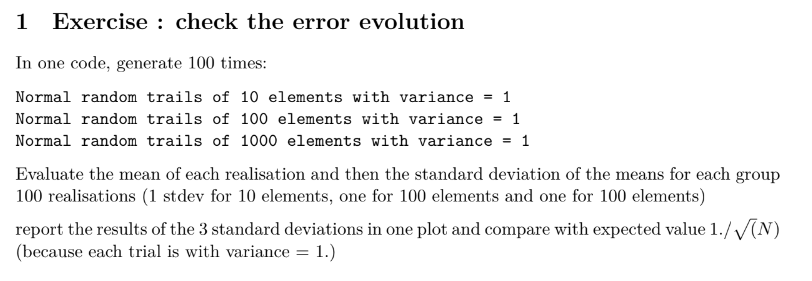

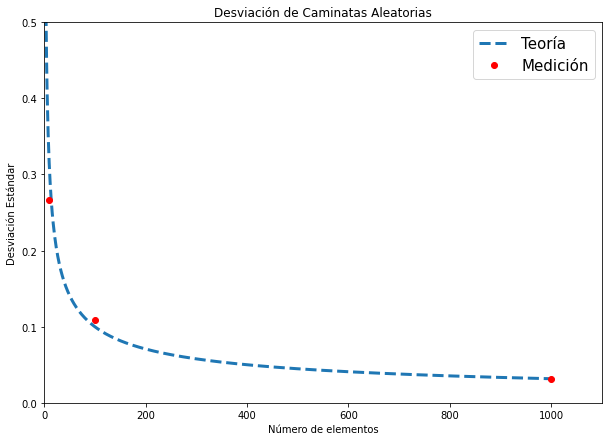

In [1]:
import numpy as np
import matplotlib.pyplot as plt


n_realizaciones = 100   #### numero de realizaciones  

#### Definimos arreglos de 10, 100 y 1000 elementos  
elementos10_arr = np.zeros(n_realizaciones)
elementos100_arr= np.zeros(n_realizaciones)
elementos1000_arr = np.zeros(n_realizaciones)


##### Corremos las n_realizaciones de caminatas aleatorias para cada los elementos de cada arreglo con una desviación  estándar std = 1 y centrado en 10 


for i in range(n_realizaciones):
    elementos10_arr[i] = np.mean( np.random.randn(10)*1.+10 ) ###(numero de elementos)*std + media
    elementos100_arr[i] = np.mean( np.random.randn(100)*1.+10 )
    elementos1000_arr[i] = np.mean( np.random.randn(1000)*1.+10 )
    
### Definimos el arreglo std_arr para guardar los tres valores de la desviacion estandar de cada caminata aleatoria

std_arr = np.zeros( 3 )  

### Definimos el arreglo elementos_arr para el numero de elementos y calculamos su correspondiente desviacion estandar


elementos_arr = np.array( [10,100,1000] )

std_arr[0] = np.std(elementos10_arr)
std_arr[1] = np.std(elementos100_arr)
std_arr[2] = np.std(elementos1000_arr)

### Definimos un espacio lineal x de 1000 puntos entre 1 y 1000 para evaluar el valor esperado y = 1/np.sqrt(x)

x= np.linspace(1., 1000, 1000)
y = 1./np.sqrt(x)

### Graficamos x contra y juntos a los valores de desviación estándar obtenidos para cada número de elementos
plt.figure( figsize=(10,7) )
plt.plot(x, y, linestyle='--', label='Teoría', lw=3)
plt.plot(elementos_arr, std_arr, 'o', label='Medición', color='red')
plt.xlim( (0,1100) )
plt.ylim( (0,0.5) )
plt.legend(fontsize=15)
plt.title('Desviación de Caminatas Aleatorias')
plt.xlabel('Número de elementos')
plt.ylabel('Desviación Estándar')
plt.show()

## Ejercicio 2

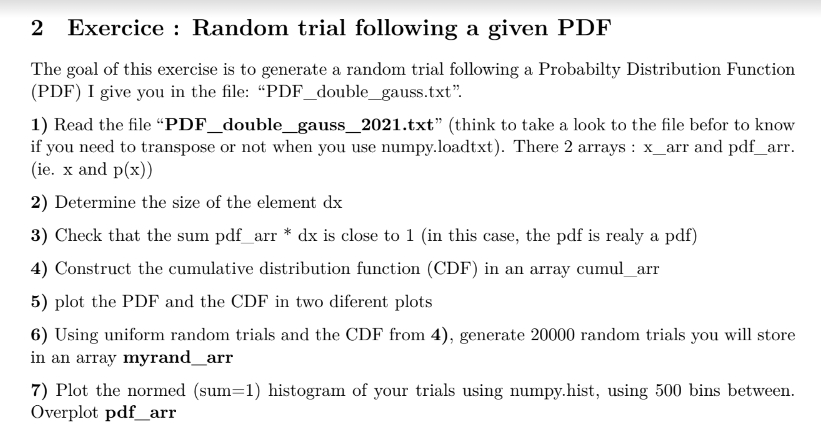

In [2]:
from google.colab import drive # Google Drive package 
drive.mount("/content/drive") #Acces My Google Drive

Mounted at /content/drive


In [5]:
cd /content/drive/My Drive/Cosmos/MetodosEstadisticos/MetodosCosmo/Practica_0

/content/drive/My Drive/Cosmos/MetodosEstadisticos/MetodosCosmo/Practica_0


dx =  0.01
np.sum(pdf_arr)* dx = 0.9999963524247931


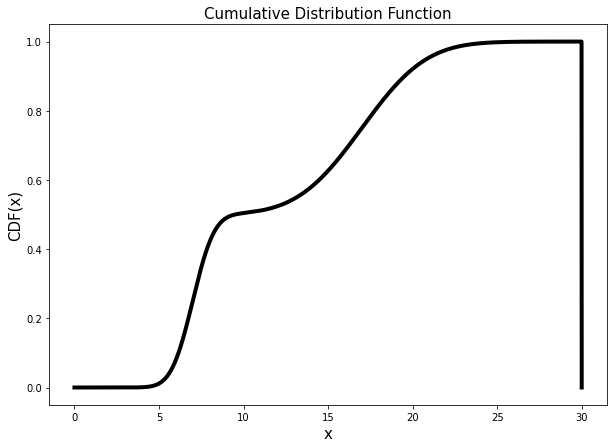

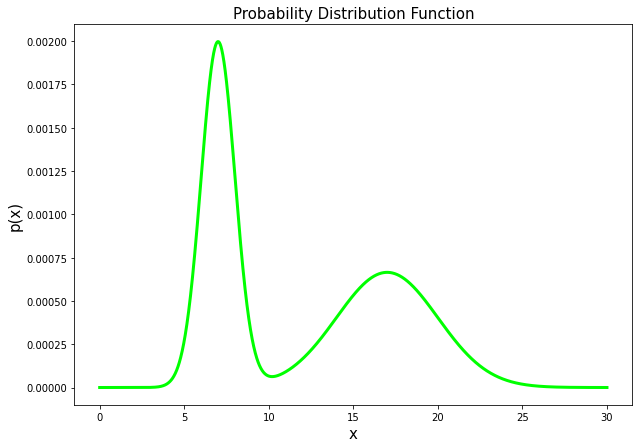

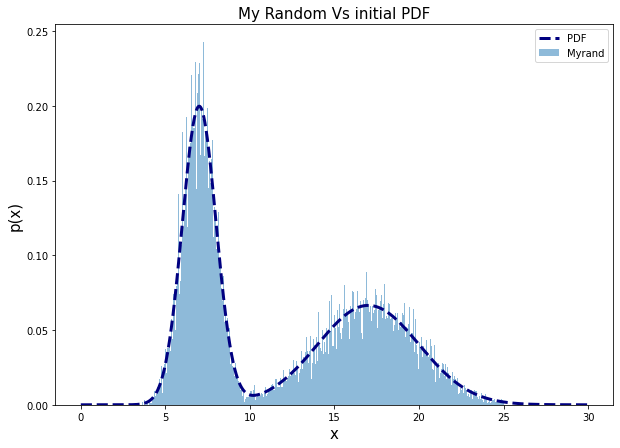

In [19]:
### Inciso 1) ###

### Cargamos el archivo desde mi unidad de Google Drive y lo separamos en dos arreglos x_arr y pdf_arr

x_arr, pdf_arr = np.loadtxt('/content/drive/My Drive/Cosmos/MetodosEstadisticos/MetodosCosmo/Practica_0/PDF_double_gauss_2021.txt').T

### Inciso 2) ###

### Definimos la variable dx como la diferencia entre los primeros elementos de arreglo x_arr e imprimimos el resultado

dx = x_arr[1] - x_arr[0]
print( "dx = ", dx)

#### Inciso 3) ####

### Hacemos la suma de los elementos de pdf_arr y la multiplicamos por dx e imprimimos el resultado 

print("np.sum(pdf_arr)* dx =", np.sum(pdf_arr) * dx)

### Inciso 4) ####

### Definimos el arreglo cumul_arr del tamaño de x_arr
cumul_arr = np.zeros(len(x_arr))


### Sustituimos los valores de cumul_arr por el producto de pdf_arr y dx más el valor anterior de cumul_arr
cumul_arr[0] = pdf_arr[0] * dx

for i in range(1,len(cumul_arr)-1):   
    cumul_arr[i] = cumul_arr[i-1] + pdf_arr[i] * dx

    
    
#### Inciso 5) ####


### Graficamos cumul_arr en función de x_arr para visualizar la CDF
plt.figure( figsize=(10,7) )
plt.plot(x_arr, cumul_arr, linewidth=4, color='black')
plt.xlabel('x', fontsize=15)
plt.ylabel('CDF(x)', fontsize=15)
plt.title('Cumulative Distribution Function', fontsize=15)
plt.show()


### Graficamos pdf_arr en función de x_arr para visualizar la PDF
plt.figure( figsize=(10,7) )
plt.plot(x_arr, pdf_arr * dx, linewidth=3, color='lime')
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.title('Probability Distribution Function', fontsize=15)
plt.show()

#### 6) ####

n_trials = 20000 ### Definimos el numero de trials
myrand_arr = np.zeros(n_trials) ### Definimos el arreglo myrand_arr

uniform_arr = np.random.random(n_trials)   #### Generamos los 20000 trials en una distrbución uniforme  

for i in range(n_trials):
    #### Obtenemos el indice en el arreglo cumul_arr que corresponde al valor de la distribución uniforme
    index = np.argmin( np.abs(cumul_arr - uniform_arr[i]) )   
    ### Definimos el correspondiente valor de myrand_arr como el valor de x_arr con el indice encontrado 
    myrand_arr[i] = x_arr[index]      


##### 7) ####

### Graficamos el histograma de nuestra distribución con PDF sobrepuesto
plt.figure( figsize=(10,7) )
plt.hist(myrand_arr, bins=500, density=True, range=(0,25),  alpha=0.5, label='Myrand' )
plt.plot(x_arr, pdf_arr, linestyle='--', linewidth=3, color='navy', label='PDF')
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.title('My Random Vs initial PDF', fontsize=15)
plt.legend()
plt.show()
    